<a href="https://colab.research.google.com/github/Saifullah785/hands-on-ml-notes-practice/blob/main/Chapter_03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import the sys module
import sys
# Assert that the Python version is 3.7 or higher
assert sys.version_info >= (3, 7)

In [6]:
# Import the version class from the packaging module
from packaging import version

# Import the sklearn library
import sklearn

# Assert that the scikit-learn version is 1.0.0 or higher
assert version.parse(sklearn.__version__) >= version.parse("1.0.0")

In [7]:
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt

# Set default font size for plots
plt.rc('font', size=14)
# Set default label and title sizes for axes
plt.rc('axes', labelsize=14, titlesize=14)
# Set default font size for the legend
plt.rc('legend', fontsize=14)
# Set default label size for x-axis ticks
plt.rc('xtick', labelsize=10)
# Set default label size for y-axis ticks
plt.rc('ytick', labelsize=10)

# **Mnist**

In [9]:
# Import the fetch_openml function from sklearn.datasets
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset and store it in the 'mnist' variable
# as_frame=False means the data will be returned as NumPy arrays
mnist = fetch_openml('mnist_784', as_frame=False)
# Display the contents of the 'mnist' object
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [10]:
# extra code - it's a bit too long
# Print the description of the MNIST dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [11]:
# Print the keys of the mnist dataset dictionary
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
# Assign the data (images) to X and the target (labels) to y
X , y = mnist.data, mnist.target
# Display the features (image data)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
# Print the shape of the features array (number of samples, number of features)
X.shape

(70000, 784)

In [14]:
# Display the target labels
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [15]:
# Print the shape of the target array (number of samples)
y.shape

(70000,)

In [16]:
# Calculate the number of pixels in a 28x28 image
28 *28

784

Saving figure some_digit_plot


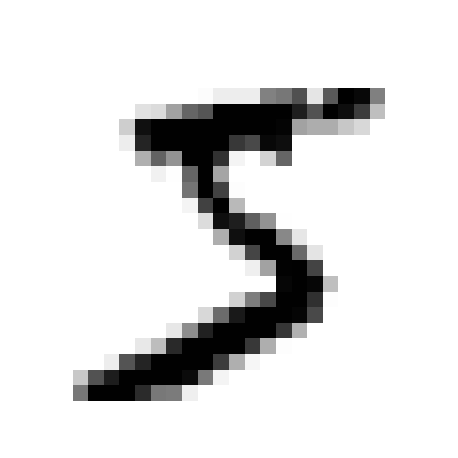

In [17]:
# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt
# Import the os module for interacting with the operating system
import os

# extra code - add a save_fig() helper function
# Define the path to save images
IMAGES_PATH = "." # or any other path you prefer to save the images
# Create the directory if it doesn't exist
os.makedirs(IMAGES_PATH, exist_ok=True)

# Define a function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Create the full path for saving the figure
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    # Print a message indicating the figure is being saved
    print("Saving figure", fig_id)
    # Apply tight layout to the plot if specified
    if tight_layout:
        plt.tight_layout()
    # Save the figure to the specified path
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Define a function to plot a single digit image
def plot_digit(image_data):
  # Reshape the 1D image data into a 28x28 2D array
  image = image_data.reshape(28, 28)
  # Display the image in grayscale
  plt.imshow(image, cmap='binary')
  # Turn off the axis
  plt.axis('off')

# Get the first digit from the dataset
some_digit = X[0]
# Plot the first digit
plot_digit(some_digit)
# Save the plot
save_fig('some_digit_plot')
# Show the plot
plt.show()

In [18]:
# Print the label of the first digit
y[0]

'5'

Saving figure mnist_digits_plot


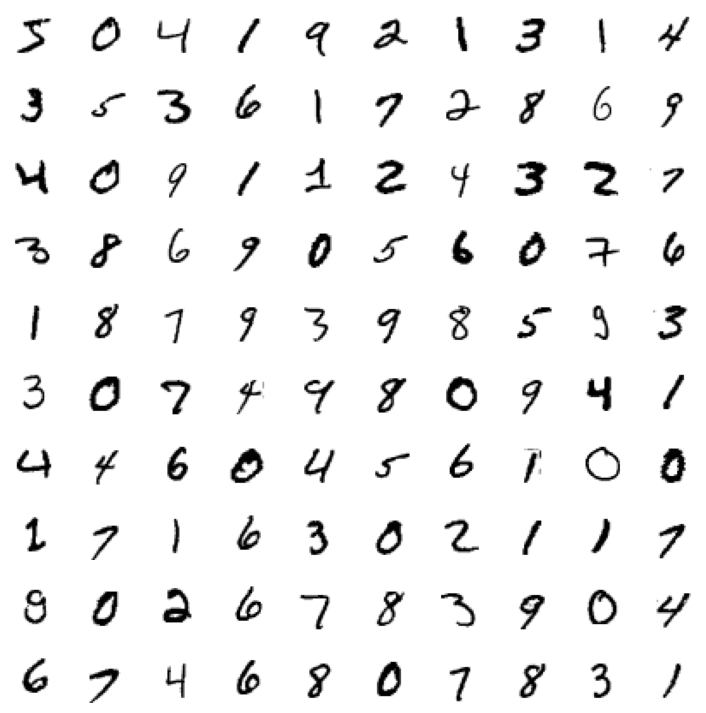

In [19]:
# Create a figure with a specified size
plt.figure (figsize=(9, 9))
# Loop through the first 100 images
for idx, image_data in enumerate(X[:100]):
  # Create subplots in a 10x10 grid
  plt.subplot(10, 10, idx + 1)
  # Plot each digit
  plot_digit(image_data)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# Save the figure
save_fig('mnist_digits_plot',tight_layout=False)
# Show the plot
plt.show()

In [20]:
# Split the data into training and testing sets
# The first 60000 samples are for training, the rest for testing
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# **Training a Binary Classifier**

In [21]:
# Create binary target variables: True if the digit is '5', False otherwise
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [22]:
# Import the SGDClassifier from sklearn.linear_model
from sklearn.linear_model import SGDClassifier

# Create an instance of the SGDClassifier with a random state for reproducibility
sgd_clf = SGDClassifier(random_state=42)
# Train the classifier on the training data
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
# Use the trained classifier to predict if the first digit (some_digit) is a '5'
sgd_clf.predict ([some_digit])

array([ True])

# **Performance Measures**

**Measuring Accuracy Using Cross Validation**

In [24]:
# Import cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score
# Perform cross-validation with 3 folds and evaluate accuracy
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [25]:
# Import StratifiedKFold and clone from sklearn.model_selection and sklearn.base
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Create a StratifiedKFold object with 3 splits
skfolds = StratifiedKFold(n_splits=3)

# Iterate through the splits
for train_index, test_index in skfolds.split(X_train, y_train_5):
  # Create a clone of the SGDClassifier for each fold
  clone_clf = clone(sgd_clf)
  # Split the training data into training and validation folds
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  # Train the clone classifier on the training fold
  clone_clf.fit(X_train_folds, y_train_folds)
  # Make predictions on the validation fold
  y_pred = clone_clf.predict(X_test_fold)
  # Count the number of correct predictions
  n_correct = sum(y_pred == y_test_fold)
  # Print the accuracy for the current fold
  print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [26]:
# Import DummyClassifier from sklearn.dummy
from sklearn.dummy import DummyClassifier

# Create an instance of the DummyClassifier
dummy_clf = DummyClassifier()
# Train the dummy classifier on the training data
dummy_clf.fit(X_train, y_train_5)
# Check if the dummy classifier predicts True for any samples in the training set
print(any(dummy_clf.predict(X_train)))

False


In [27]:
# Perform cross-validation with 3 folds and evaluate accuracy of the dummy classifier
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

# **Confusion Matrix**

In [28]:
# Import cross_val_predict from sklearn.model_selection
from sklearn.model_selection import cross_val_predict

# Perform cross-validation and get the predictions for each sample in the training set
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix using the true labels and predicted labels
cm = confusion_matrix(y_train_5, y_train_pred)
# Display the confusion matrix
cm

array([[53892,   687],
       [ 1891,  3530]])

In [30]:
# Create a perfect prediction scenario where predictions are the same as the true labels
y_train_perfect_predictions = y_train_5
# Calculate the confusion matrix for the perfect predictions
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

# **Precision and Recall**

In [31]:
# Import precision_score and recall_score from sklearn.metrics
from sklearn.metrics import precision_score, recall_score

# Calculate and print the precision score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [32]:
# Calculate precision manually from the confusion matrix
# True Positives / (True Positives + False Positives)
cm [1, 1] / (cm [0, 1] + cm [1, 1])

np.float64(0.8370879772350012)

In [33]:
# Calculate and print the recall score
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [34]:
# Calculate recall manually from the confusion matrix
# True Positives / (True Positives + False Negatives)
cm [1, 1] / (cm [1, 0] + cm [1, 1])

np.float64(0.6511713705958311)

# **Precision /Recall Trade-off**

In [35]:
# Get the decision function scores for the first digit
y_scores = sgd_clf.decision_function([some_digit])
# Display the scores
y_scores

array([2164.22030239])

In [36]:
# Set a threshold and predict based on the decision function score
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [37]:
# Display the prediction
y_some_digit_pred

array([ True])

In [38]:
# Check if the decision function score is greater than 0
y_scores > 0

array([ True])

In [39]:
# Set a new threshold and predict based on the decision function score
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
# Display the new prediction
y_some_digit_pred

array([False])

In [40]:
# Get decision function scores for the entire training set using cross-validation
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [41]:
# Import precision_recall_curve from sklearn.metrics
from sklearn.metrics import precision_recall_curve

# Calculate precision, recall, and thresholds for the decision scores
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


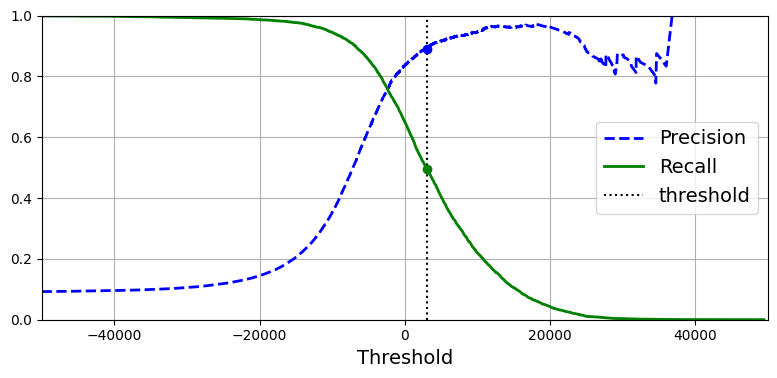

In [42]:
# Plot the precision and recall curves against the thresholds
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

In [43]:
# Find the threshold for 90% precision
idx_for_90_percent_precision = (precisions >= 0.90).argmax()
threshold_for_90_percent_precision = thresholds[idx_for_90_percent_precision]
# Display the threshold
threshold_for_90_percent_precision

np.float64(3370.0194991439557)

In [44]:
# Make predictions based on the 90% precision threshold
y_train_pred_90 = (y_scores >= threshold_for_90_percent_precision)

In [45]:
# Calculate and print the precision score for the 90% precision predictions
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [46]:
# Calculate and print the recall score at 90% precision
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision
#

0.4799852425751706

#**The ROC Curve**

In [47]:
# Import roc_curve from sklearn.metrics
from sklearn.metrics import roc_curve

# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


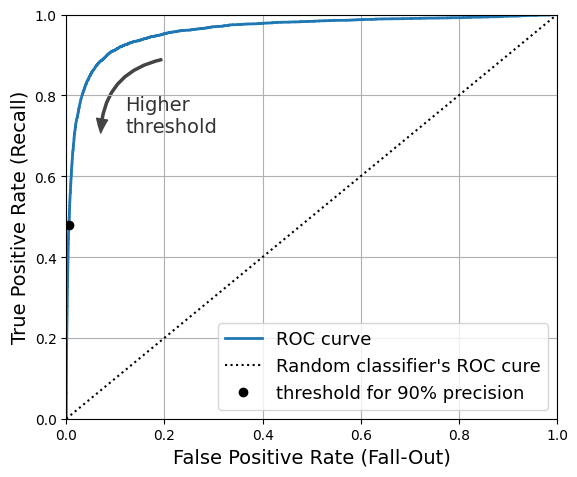

In [48]:
# Import roc_curve from sklearn.metrics
from sklearn.metrics import roc_curve
import matplotlib.patches as patches # Import the patches module

# Find the index of the threshold closest to the 90% precision threshold on the ROC curve
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_percent_precision).argmax()
# Get the corresponding tpr and fpr values
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve ")
# Plot the ROC curve for a random classifier
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC cure")
# Plot a point on the ROC curve corresponding to the 90% precision threshold
plt.plot([fpr_90],[tpr_90], 'ko', label='threshold for 90% precision')

# Add an arrow and text to indicate the direction of higher thresholds
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle='arc3, rad=.4',
    arrowstyle='simple, tail_width=1.5, head_width=8, head_length=10',
    color='#444444'
    ))

plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
# Set axis labels and title
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
# Save the figure
save_fig("roc_curve_plot")

plt.show()

In [49]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Calculate and print the ROC AUC score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [50]:
# Import RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier with a random state
forest_clf = RandomForestClassifier(random_state=42)

In [51]:
# Get the estimated probabilities for the training set using cross-validation
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [52]:
# Display the first two probability estimates
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

*These are estimated probabilities. Among the images that the model classified as positive with a probability between 50% and 60%, there are actually about 94% positive images:*

In [53]:
# Calculate the percentage of positive samples among those predicted with a probability between 0.5 and 0.6
idx_50_to_60 = (y_probas_forest[:,1] > 0.50 ) & (y_probas_forest[:,1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [54]:
# Get the probability estimates for the positive class
y_scores_forest = y_probas_forest[:,1]
# Calculate precision, recall, and thresholds for the Random Forest classifier
precision_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

Saving figure pr_curve_comparison_plot


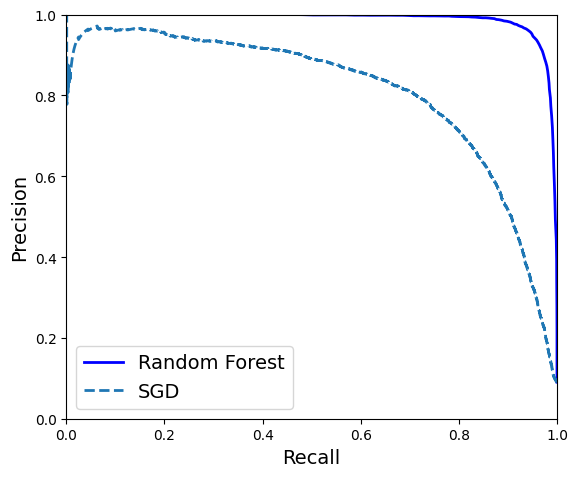

In [55]:
# Plot the precision-recall curve for the Random Forest classifier and compare it to the SGD classifier
plt.figure(figsize=(6, 5))
plt.plot(recalls_forest, precision_forest, 'b-', linewidth=2,
         label='Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2,
         label='SGD')
plt.grid()

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

In [56]:
# Import f1_score from sklearn.metrics
from sklearn.metrics import f1_score

# Make predictions for the Random Forest classifier with a threshold of 0.5
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
# Calculate and print the F1 score for the Random Forest classifier
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [57]:
# Calculate and print the ROC AUC score for the Random Forest classifier
roc_auc_score(y_train_5, y_scores_forest)
#

np.float64(0.9983436731328145)

In [58]:
# Calculate and print the precision score for the Random Forest classifier
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [59]:
# Calculate and print the recall score for the Random Forest classifier
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

#**Multiclass Classification**

In [60]:
from sklearn.svm import SVC

# Create an SVC classifier instance with a random state for reproducibility
svm_clf = SVC(random_state=42)
# Train the SVC classifier on the first 2000 samples of the training data
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [61]:
# Use the trained SVC classifier to predict the digit of the first sample
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [62]:
# Get the decision function scores for the first digit using the trained SVC classifier
some_digit_scores = svm_clf.decision_function([some_digit])
# Round the scores to 2 decimal places for better readability
some_digit_scores.round(2)

array([[ 1.73,  2.73,  7.25,  8.31, -0.31,  9.31,  1.71,  2.77,  6.23,
         4.85]])

In [64]:
# Find the index of the class with the highest decision function score
class_id = some_digit_scores.argmax()
# Display the class index
class_id

np.int64(5)

In [63]:
# Get the list of classes the SVC classifier was trained on
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [65]:
# Get the predicted class label using the class index found earlier
svm_clf.classes_[class_id]

'5'

In [66]:
# Set the decision function shape to "ovo" (One-vs-One)
svm_clf.decision_function_shape = "ovo"
# Get the decision function scores for the first digit using the One-vs-One approach
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
# Round the scores to 2 decimal places
some_digit_scores_ovo.round(2)

array([[ 0.18, -1.43, -1.34,  0.61, -1.53, -0.01, -0.26, -0.43, -0.5 ,
        -0.17, -1.63,  0.7 , -1.82,  0.04,  0.02, -1.  , -0.39, -0.81,
         1.26, -1.  ,  0.87,  0.53,  0.2 ,  0.38,  2.35, -1.  ,  1.44,
         1.9 ,  1.48,  2.02, -2.4 , -0.74, -1.32, -2.01, -2.43,  2.75,
         1.27,  1.82,  2.01, -0.6 , -1.09, -0.68, -0.62, -0.15,  0.59]])

In [67]:
# Import the OneVsRestClassifier from sklearn.multiclass
from sklearn.multiclass import OneVsRestClassifier

In [68]:
# Create a OneVsRestClassifier with an SVC base estimator
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
# Train the OneVsRestClassifier on the first 2000 samples of the training data
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [69]:
# Use the trained OneVsRestClassifier to predict the digit of the first sample
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [70]:
# Get the number of estimators (classifiers) in the OneVsRestClassifier
len(ovr_clf.estimators_)

10

In [71]:
# Create an SGDClassifier instance with a random state for reproducibility
sgd_clf = SGDClassifier(random_state=42)
# Train the SGDClassifier on the entire training data
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [72]:
# Use the trained SGDClassifier to predict the digit of the first sample
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [73]:
# Get the decision function scores for the first digit using the trained SGDClassifier
# Round the scores to the nearest integer
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [74]:
# Perform cross-validation with 3 folds to evaluate the accuracy of the SGDClassifier
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [76]:
# Import the StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()
# Import numpy for numerical operations
import numpy as np
# Scale the training data
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [79]:
# Perform cross-validation with 3 folds to evaluate the accuracy of the SGDClassifier on scaled training data
 cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")